In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-dataset/Walmart.csv


# Data Analysis And preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

About this file

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:\

    Store - the store number
    Date - the week of sales
    Weekly_Sales - sales for the given store
    Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
    Temperature - Temperature on the day of sale
    Fuel_Price - Cost of fuel in the region
    CPI – Prevailing consumer price index
    Unemployment - Prevailing unemployment rate

In [3]:
data = pd.read_csv("/kaggle/input/walmart-dataset/Walmart.csv")
data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
import datetime as dt
data['Date'] = pd.to_datetime(data['Date'], format='mixed') 
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
 
data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5


# Visualization

In [8]:
fig = px.scatter_matrix(data, dimensions=['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], width=1000, height=1000)
fig.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

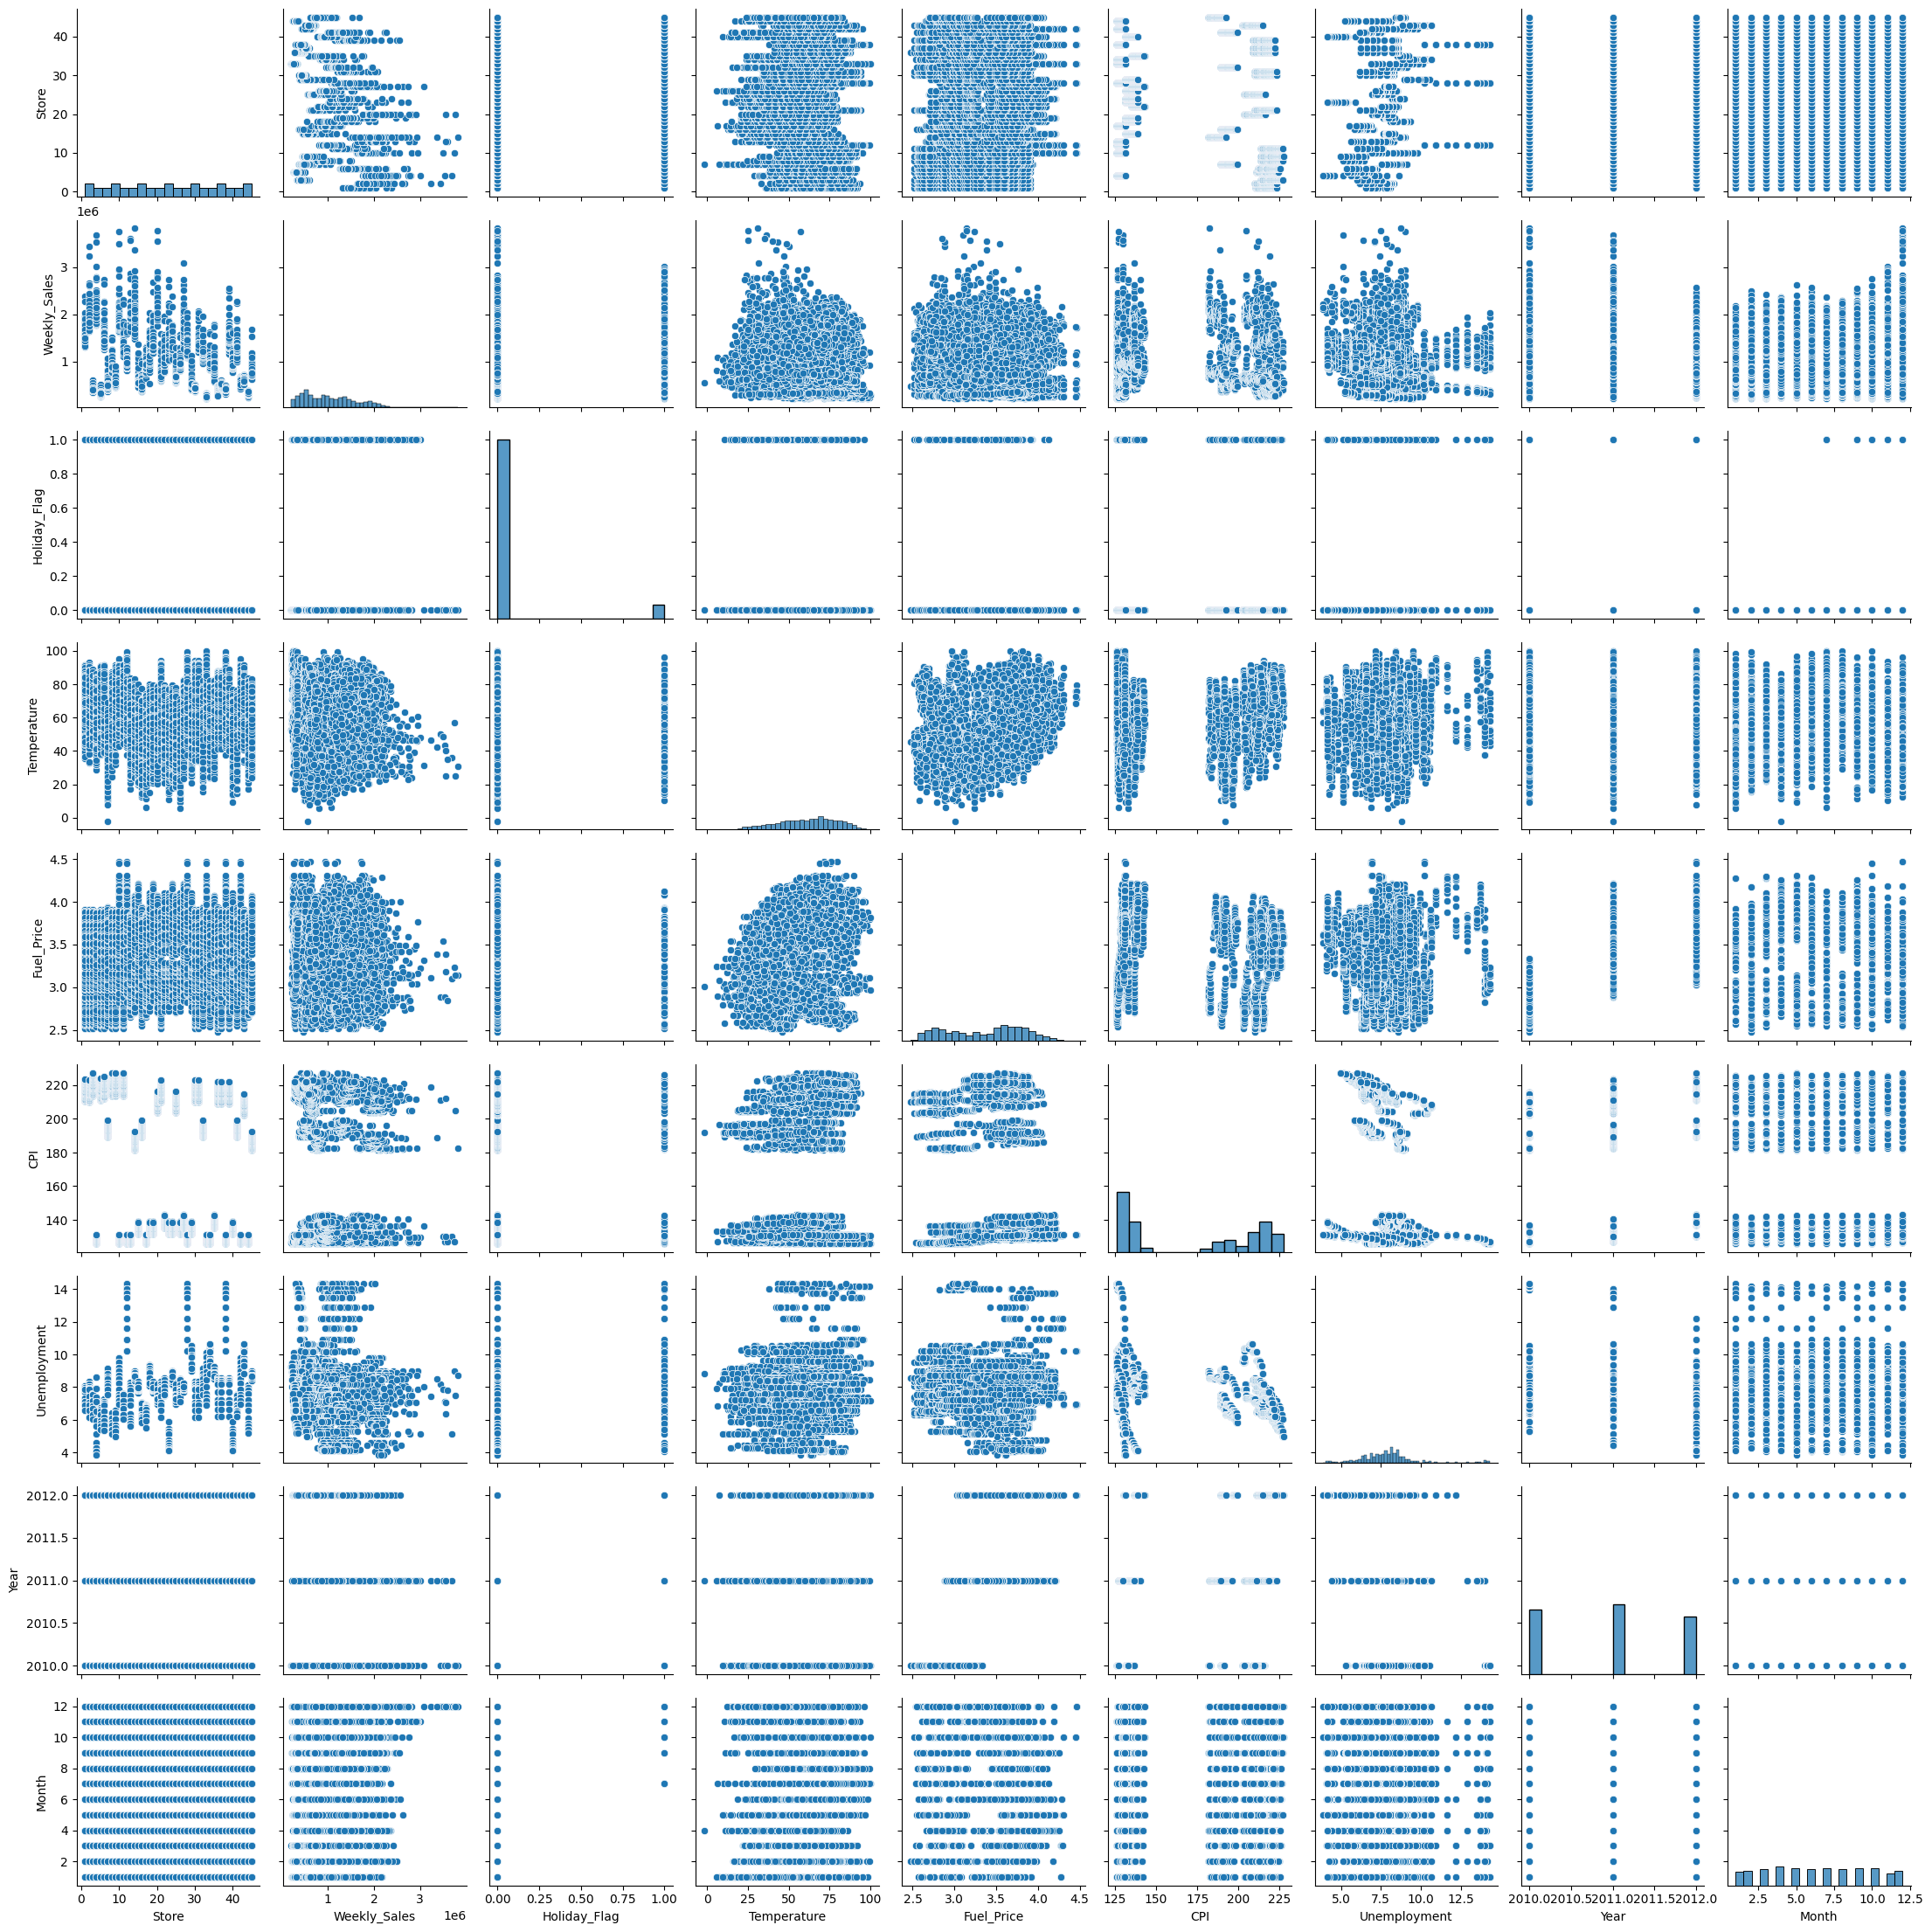

In [9]:
sns.pairplot(data)

In [10]:
correlation = abs(data.corr()).sort_values(by = 'Weekly_Sales', ascending = False)
correlation

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
Weekly_Sales,3.353320e-01,4.591803e-03,1.000000,3.689097e-02,0.063810,0.009464,0.072634,0.106176,1.837754e-02,6.753523e-02
Store,1.000000e+00,9.236323e-14,0.335332,4.386841e-16,0.022659,0.060023,0.209492,0.223531,3.474318e-12,6.289676e-16
Unemployment,2.235313e-01,2.399007e-01,0.106176,1.096028e-02,0.101158,0.034684,0.302020,1.000000,2.418135e-01,2.061552e-03
CPI,2.094919e-01,7.452964e-02,0.072634,2.162091e-03,0.176888,0.170642,1.000000,0.302020,7.479573e-02,1.478843e-03
Month,6.289676e-16,2.059187e-01,0.067535,3.322341e-01,0.066440,0.052832,0.001479,0.002062,1.390145e-01,1.000000e+00
Temperature,2.265908e-02,8.856737e-02,0.063810,1.550913e-01,1.000000,0.144982,0.176888,0.101158,6.426923e-02,6.643970e-02
Holiday_Flag,4.386841e-16,5.698654e-02,0.036891,1.000000e+00,0.155091,0.078347,0.002162,0.010960,5.678257e-02,3.322341e-01
Year,3.474318e-12,9.399969e-01,0.018378,5.678257e-02,0.064269,0.779470,0.074796,0.241813,1.000000e+00,1.390145e-01
Fuel_Price,6.002295e-02,7.526049e-01,0.009464,7.834652e-02,0.144982,1.000000,0.170642,0.034684,7.794703e-01,5.283174e-02
Date,9.236323e-14,1.000000e+00,0.004592,5.698654e-02,0.088567,0.752605,0.074530,0.239901,9.399969e-01,2.059187e-01


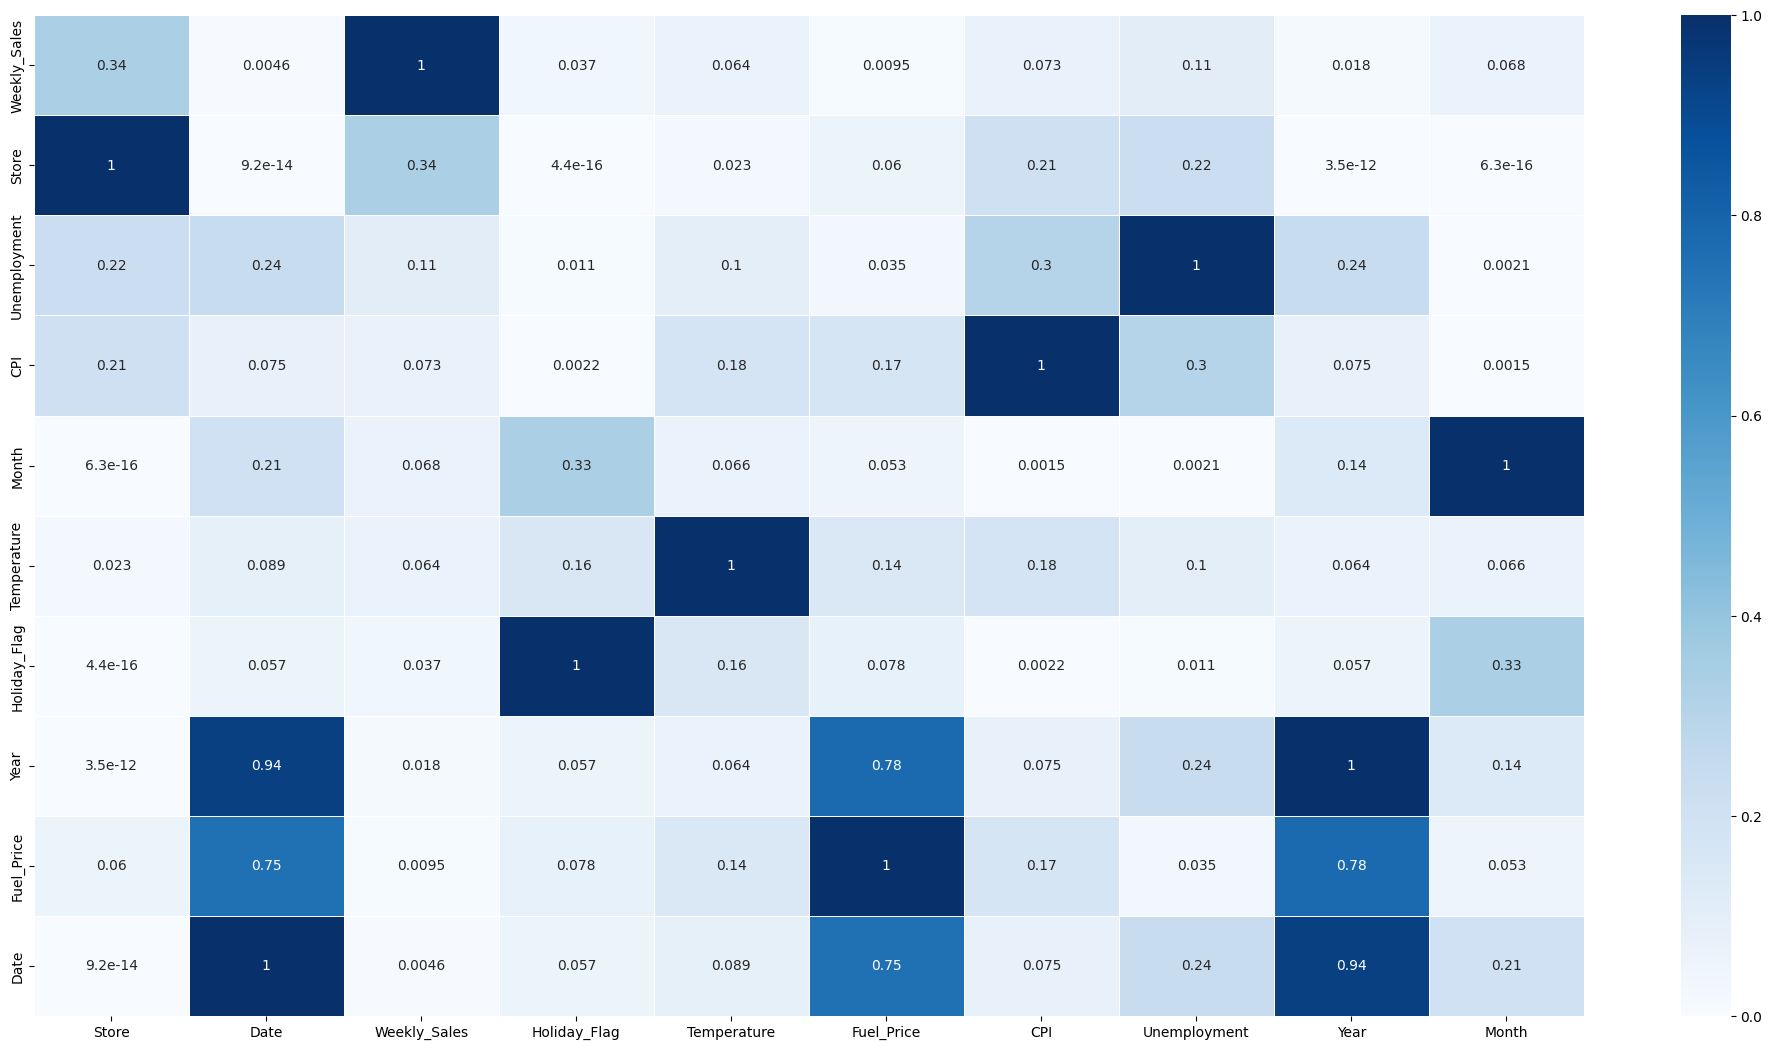

In [11]:
plt.figure(figsize=(25, 13))
sns.heatmap(correlation, annot=True, cmap='Blues',linewidths=0.5);

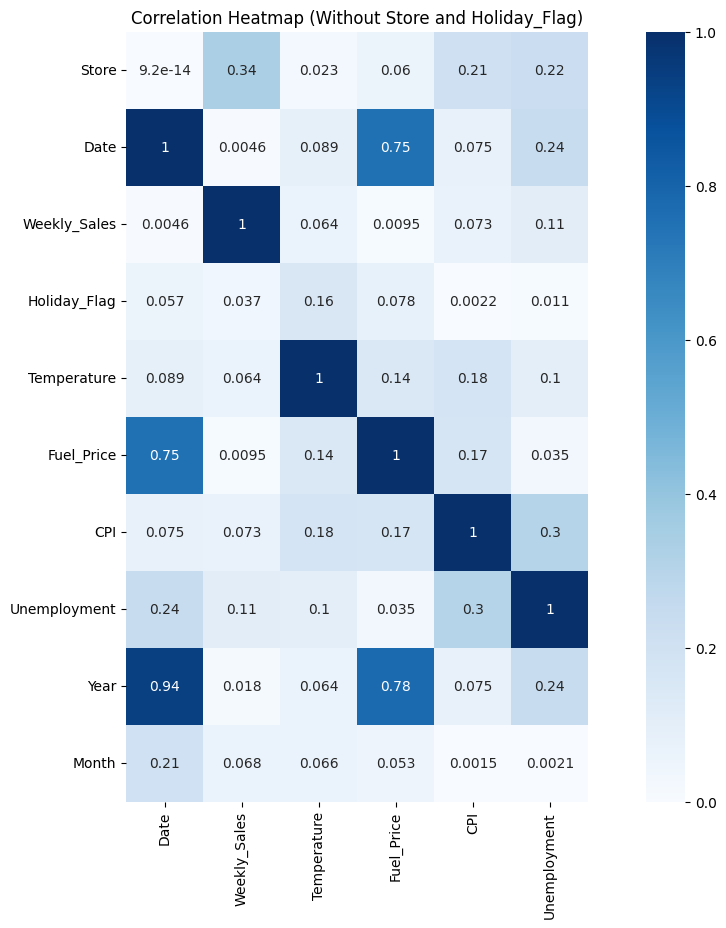

In [12]:
matrix = abs(data.corr())
matrix = matrix.drop(['Store', 'Holiday_Flag','Month','Year'], axis=1)

plt.figure(figsize=(15, 10))
sns.heatmap(matrix, annot=True, cmap='Blues', square=True)
plt.title('Correlation Heatmap (Without Store and Holiday_Flag)')
plt.show()

In [13]:
data  = data.drop(columns = 'Date', axis = 1)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Year          6435 non-null   int32  
 8   Month         6435 non-null   int32  
dtypes: float64(5), int32(2), int64(2)
memory usage: 402.3 KB


In [15]:
feature = data.drop(columns = 'Weekly_Sales', axis = 1).copy()
label = data['Weekly_Sales'].copy()

In [16]:
from sklearn.neighbors import KNeighborsRegressor

hotstore = pd.get_dummies(data['Store'], prefix='store')
print(hotstore.head())

feature = pd.concat([feature, hotstore], axis = 1)

   store_1  store_2  store_3  store_4  store_5  store_6  store_7  store_8  \
0     True    False    False    False    False    False    False    False   
1     True    False    False    False    False    False    False    False   
2     True    False    False    False    False    False    False    False   
3     True    False    False    False    False    False    False    False   
4     True    False    False    False    False    False    False    False   

   store_9  store_10  ...  store_36  store_37  store_38  store_39  store_40  \
0    False     False  ...     False     False     False     False     False   
1    False     False  ...     False     False     False     False     False   
2    False     False  ...     False     False     False     False     False   
3    False     False  ...     False     False     False     False     False   
4    False     False  ...     False     False     False     False     False   

   store_41  store_42  store_43  store_44  store_45  
0     Fa

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature = scaler.fit_transform(feature)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, label, random_state = 42, test_size = 0.2)

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

knnr = KNeighborsRegressor(n_neighbors=7)
knnr.fit(x_train, y_train)

y_pred = knnr.predict(x_test)

print('MSE', mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2', r2_score(y_test, y_pred))

MSE 20265435187.46369
RMSE 142356.7180974038
R^2 0.9370940616331045
